# PairGrid, for pairwise relationships

In the FacetGrid tutorial, we plotted a matrix of graphs of two variables, with a third dimension along each plot.
What if that analysis was not sufficient to completely figure out how to manage facebook posts? What if we want to plot a matrix of graphs, each of which have different x and y axes?

Recollecting what we looked at in Module 1, we plotted very similar graphs using pairplot. here, we look at Seaborn's PairGrid feature, a subplot grid for plotting pairwise relationships in a dataset. 

The result is a grid of pairwise plots, and can be considered a scatterplot matrix.

#### How do we use PairGrid?
* We first initialise a PairGrid object with a dataframe
* Specify the row, column and hue parameters
* Every set of x and y variables creates a plot as one element of the matrix. The upper and lower triangle will have mirrored plots.
* A plotting function is applied to each subplot by using a map function


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fb_data=pd.read_csv('datasets/dataset_Facebook.csv',
                     sep=r'\s*;\s*', engine='python')

#### Plotting a simple PairGrid plot

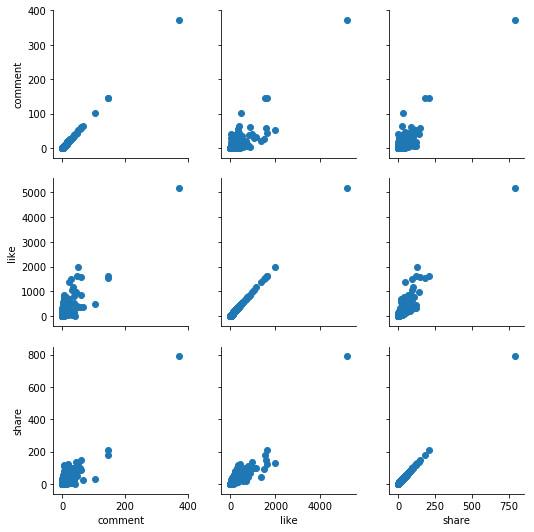

In [3]:
g = sns.PairGrid(fb_data,
                 vars=["comment", "like", "share"])

g.map(plt.scatter);

* We see that the number of likes greatly surpasses the nuber of comments/shares, simply from the limits of the axes. This is also clear from the fact that the scatter plot is shifted towards the 'like' axis in all posts with like as an axis.
* The number of shares versus the number comments for every post shows a mixed reaction. From the alignment of the scatter plot, posts with a greater number of comments is more in the sample set.

As seen earlier, we see the the graphs along the principal diagonal are univariate distributions, and thus show a straight line distribution.

#### Can we introduce other plots into this matrix? Possibly different for the univariate and bivariate distributions?

We split the map function into two -  
* one for the principal diagonal elements, which are univariate distributions
* One for the rest, which are bivariate disributions

No handles with labels found to put in legend.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


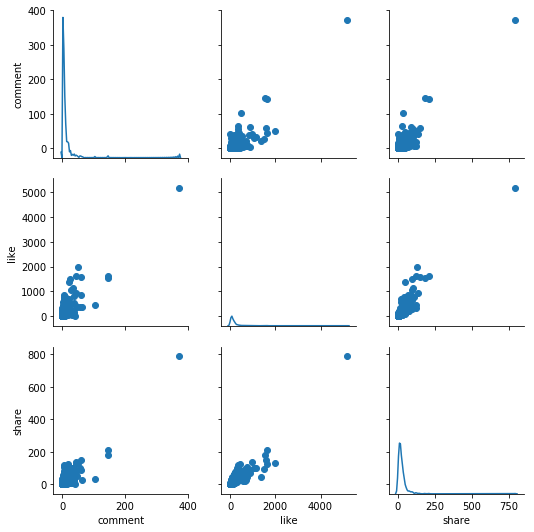

In [7]:
g = sns.PairGrid(fb_data,
                 vars=["comment", "like", "share"])
g.map_offdiag(plt.scatter) 
g.map_diag(sns.kdeplot) 

### Adding a third dimension to our PairGrid using the "hue" parameter,

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


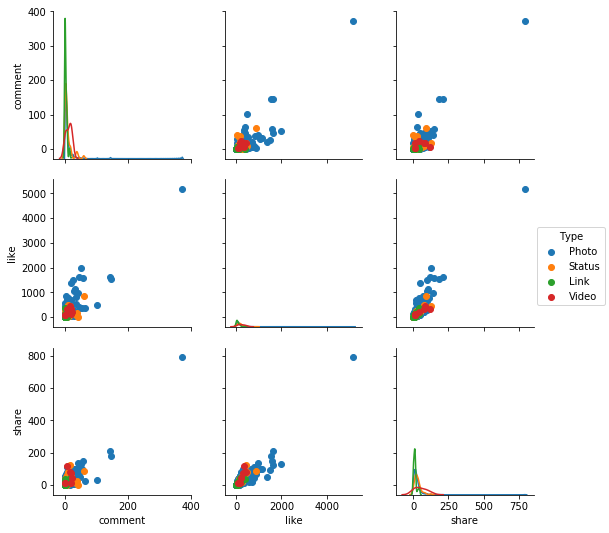

In [8]:
g = sns.PairGrid(fb_data,
                 vars=["comment", "like", "share"],
                 hue="Type")
g.map_offdiag(plt.scatter) 
g.map_diag(sns.kdeplot) 
g.add_legend()

The third dimension is evident in the KDE plots, where we can see curves for every type of post available.

### Plotting different relations in the upper and lower triangles of the matrix

No handles with labels found to put in legend.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


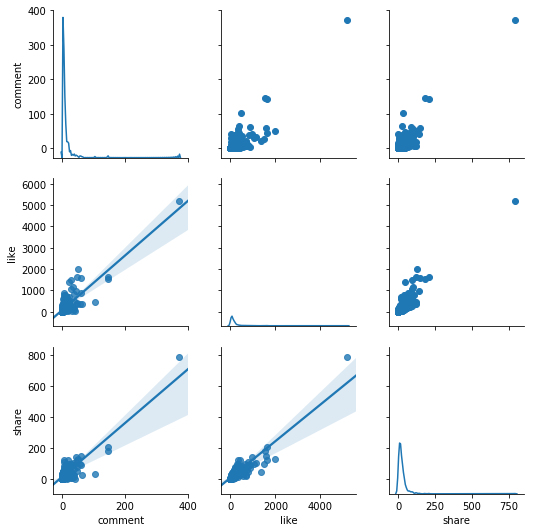

In [11]:
g = sns.PairGrid(fb_data,
                 vars=["comment", "like", "share"])

g.map_diag(sns.kdeplot) 
g.map_upper(plt.scatter) 
g.map_lower(sns.regplot)

### If we want to customise the matrix parameters, explicitly specify x and y variables

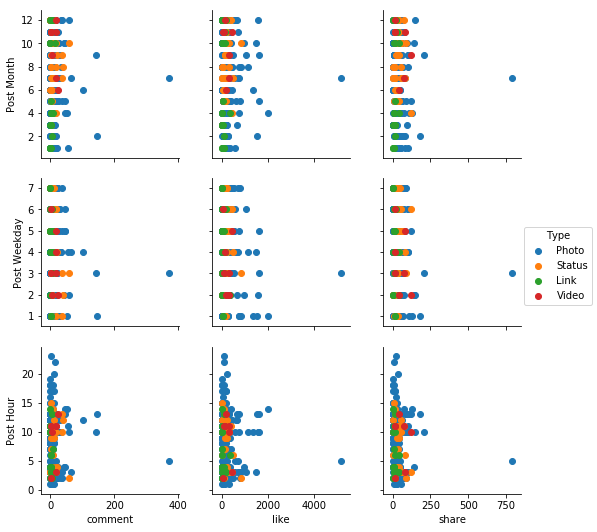

In [12]:
g = sns.PairGrid(fb_data,
                 x_vars=["comment", "like", "share"],
                 y_vars=["Post Month", "Post Weekday", "Post Hour"],
                 hue="Type")
g.map(plt.scatter) 
g.add_legend()

In the above set of plots, we can easily see the relation between when the posts were made and how much response it garnered. 

We see that there are some posts made every hour, some every week, and some every month.These posts are a combination of photos, links, videos and statuses. 
From the graphs seen above, most posts have managed to achieve atleast a minimal response in different forms.